# Name: Akshay Mali

### GRIP @ The Sparks Foundation

**Task 2:** 

Implementation of simple linear regression analysis.

<img src="Simple_linear_Regression.gif" width="750" align="center">

## Problem Statement

Predict the percentage of an student based on the numbers of study hours.

## Dataset Name

student_scores - student_scores.csv

## Column Description

Independent Variable : **Hours** (Number of hours student has studied in a day)

Target Variable : **Scores** (Percentage of marks obtained by the student corresponding to the number of study hours he has studied)

## Table of Contents

1. Importing Libraries
2. Data understanding
3. Building a model
4. Evaluationg the model
5. Predicting the score if a student studies for 9.25 hrs/ day?

## 1. Importing Libraries

In [116]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")#to hide or ignore the warnings

## 2. Data understanding

In [117]:
# Reading the dataset
data=pd.read_csv("student_scores - student_scores.csv")
data.head()#fisrt 5 records

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [118]:
data.shape# Shape of the data

(25, 2)

**The dataset has 25 students**

**The hours they have studied with respect to there score is mentioned**

In [119]:
data.info()# Info of the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


**"Hours" is of the "float" datatype**<br>
**"Scores" is of the "int" datatype.** 

**The target variable is a number and continous in nature. The first assumption of the Linear regression is satified**

In [120]:
# Statistical Summary of the data
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


**Maximum hours** that a student has studied is **9.2 hrs**.<br>
**Minimum hours** that a student has studied is **1.1 hrs**.<br>
**Maximum marks** obtained by any student is **95**.<br>
**Minimum marks** obtained by any student is **17**.

In [121]:
# Maximum hours of study 9.2 hrs
data[data.Hours==9.2]

,Hours,Scores
6,9.2,88


**Since the maximum marks is 95, the student who has studied for the highest number of hours is not the topper.**

In [122]:
# Minimum hours of study1.1 hrs
data[data.Hours==1.1]

,Hours,Scores
14,1.1,17


**The student who has studied for the least number of hours is the one with the lowest score.**

### Checking the Missing

In [123]:
data.isnull().sum()# Checking for the Standard missing values

Hours     0
Scores    0
dtype: int64

In [124]:
# Checking for non-standard missing values for any characters like #,%,?.......
for i in data.columns:
    print("Unique values for the column:",i)
    print(np.unique(data[i]))

Unique values for the column: Hours
[1.1 1.5 1.9 2.5 2.7 3.2 3.3 3.5 3.8 4.5 4.8 5.1 5.5 5.9 6.1 6.9 7.4 7.7
 7.8 8.3 8.5 8.9 9.2]
Unique values for the column: Scores
[17 20 21 24 25 27 30 35 41 42 47 54 60 62 67 69 75 76 81 85 86 88 95]


**There are no missing values of any kind(standard/non-standard) in the given dataset.**

## Duplicate Values check

In [125]:
# Check for duplicate entries

len(data[data.duplicated()])

0

**There are no duplicate records**

## Skewness

In [126]:
print("Skew value for the columns:")
print(data.skew())

Skew value for the columns:
Hours     0.190338
Scores    0.233965
dtype: float64


## Distribution Plot

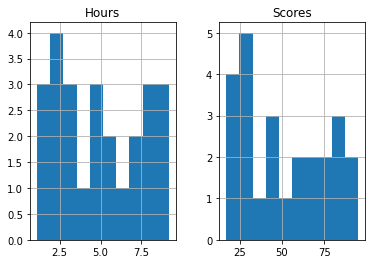

In [127]:
# Distribution Check
data.hist()
plt.show()

**we see both the variables are normally distributed and their skew values are closer to 0.**

## Pair Plot

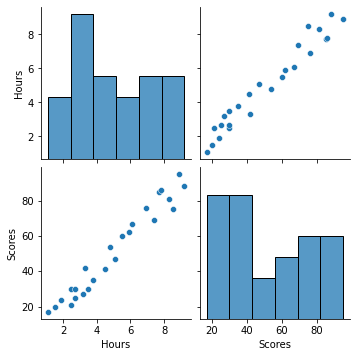

In [128]:
sns.pairplot(data)
plt.show()

### Outlier Check

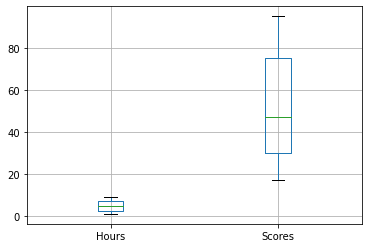

In [129]:
# Outlier Check using boxplot
data.boxplot()
plt.show()

**There are no outliers in any of the columns.**

### Realationship between target and independent variable.

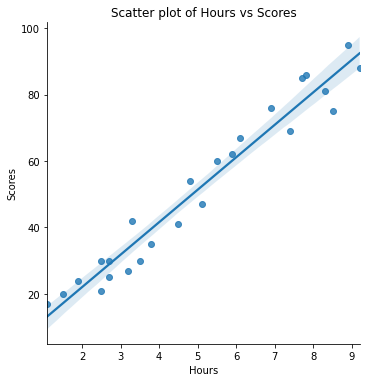

In [130]:
sns.lmplot(x="Hours",y="Scores",data=data)
plt.title("Scatter plot of Hours vs Scores")
plt.show()

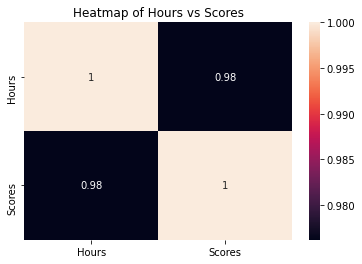

In [131]:
sns.heatmap(data.corr(),annot=True)
plt.title("Heatmap of Hours vs Scores")
plt.show()

**Both lmplot and heatmap shows that target(Scores) and independent(Hours) are strongly related with a correlation of 0.98.
That means, there is a linear relationship between the target and the independent variable.**

## EDA Summary

1. The dataset has records of 25 students and their scores correspondong to their number of study hours.
2. The target variable is a number and continous in nature. The first assumption of the Linear regression is satified.
3. There is no mistake in the datatype of the variables when compared to the probelm statement.
4. The student who has studied for the highest number of hours(9.2hrs) is not the topper(88 score).
5. The student who has studied for the least number of hours(1.1hrs) is the one with the lowest score(17).
7. There are no missing values of any kind(standard/non-standard) or duplicate records in the given dataset.
8. Both the variables are normally distributed and their skew values are closer to 0.
9. There are no outliers in any of the variables.
10. From the lmplot and heatmap,there is a linear relationship between the target and the independent variable.

## 3. Building a Simple Linear Regression Model

In [132]:
# Defining the target as y and independent variable as X
X=data.drop("Scores",axis=1)
y=data["Scores"]
X.head()

,Hours
0,2.5
1,5.1
2,3.2
3,8.5
4,3.5


In [133]:
y.head()

0    21
1    47
2    27
3    75
4    30
Name: Scores, dtype: int64

### Train-Test Split

In [134]:
# Import train_test_split function
# Split in the ratio train:test=0.7:0.3
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=4)

### Linear Regression model 

In [135]:
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression()

## Making Prediction

In [136]:
y_pred=regressor.predict(X_test)
print(y_pred)

[40.5054997  50.46249282 27.56140864 87.30336737 47.47539489 79.33777287
 94.27326256 61.41518526]


## Comparing Actual and Predicted Values

In [137]:
df1=pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df1

,Actual,Predicted
22,35,40.505500
21,54,50.462493
0,21,27.561409
3,75,87.303367
12,41,47.475395
10,85,79.337773
6,88,94.273263
11,62,61.415185


## Checking the accuracy scores for training and test set

In [138]:
print("Training Score:",regressor.score(X_train,y_train))
print("Testing Score: ",regressor.score(X_test,y_test))

Training Score: 0.9622851960701551
Testing Score:  0.9151481119722988


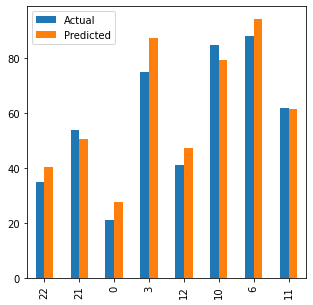

In [139]:
df1.plot(kind='bar',figsize=(5,5))
plt.show()

## 4. Model Performance Evaluation

In [140]:
from sklearn import metrics  
print("Mean Absolute Error: ",metrics.mean_absolute_error(y_test,y_pred))
print("Mean Squared Error: ",metrics.mean_squared_error(y_test,y_pred))
print("Root Mean Squared Error: ",np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

Mean Absolute Error:  5.862935275773163
Mean Squared Error:  43.867100299571064
Root Mean Squared Error:  6.62322431294389


## 5. Predicting the score if a student studies for 9.25 hrs/ day?

In [141]:
hours =np.array(9.25)
hours=hours.reshape(1,-1)
own_pred = regressor.predict(hours)
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))

No of Hours = [[9.25]]
Predicted Score = 94.77111221192709


In [40]:
#----------------------------------------------------END---------------------------------------------------------------------#